In [67]:
import requests
import pytz
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from cycler import cycler
import re


In [24]:
url = "https://publicationtool.jao.eu/core/api/data/refprog"
params = {"FromUtc": "2025-01-09T23:00:00.000Z","ToUtc": "2025-01-10T23:00:00.000Z"}

try:
    response = requests.get(url, params=params, verify=False)
    response.raise_for_status()
    data = response.json()
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")

data_list = data['data']
df = pd.DataFrame(data_list)
df['dateTimeUtc'] = pd.to_datetime(df['dateTimeUtc'], utc=True)
df['dateTimeUtc'] = df['dateTimeUtc'].dt.tz_convert(pytz.timezone('Europe/Ljubljana'))
df['dateTimeUtc'] = df['dateTimeUtc'].dt.tz_localize(None)
df = df.drop(df.columns[0], axis=1) # Nepotreben 'id' stolpec
df.columns = df.columns.str.replace('border_', '', regex=False)

c:\Users\Jaka\anaconda3\lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicationtool.jao.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [ ]:
# Seznam vseh držav/povezav
unique_countries = set()
for col in df.columns:
    unique_countries.update(col.split('_'))  # Split by '_' and add to the set
unique_countries = sorted(unique_countries)

In [77]:
# Filter columns starting with 'border_SI_'
selected_country = 'SI'
# filtered_columns = [col for col in df.columns if selected_country in col]
pattern = rf'^{selected_country}_[A-Z]+|^[A-Z]+_{selected_country}$'
filtered_columns = [col for col in df.columns if re.match(pattern, col)]
df_ref = df[filtered_columns].copy()

# # Dynamically rename columns to remove the selected country - Prikaz samo imena druge države
# new_col_names = {col: col.replace(f'{selected_country}_', '').replace(f'_{selected_country}', '') for col in filtered_columns}
# df_ref.rename(columns=new_col_names, inplace=True)

# Dynamically rename columns to remove the selected country
new_col_names = {col: col.replace('_', '-') for col in filtered_columns}
df_ref.rename(columns=new_col_names, inplace=True)

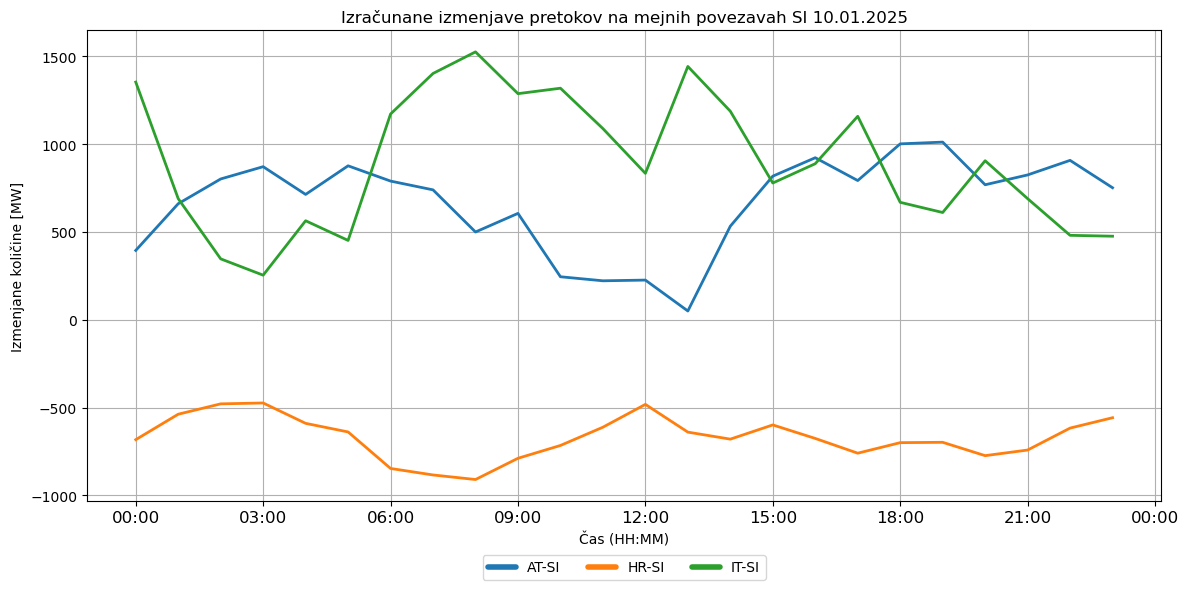

In [78]:

date_str = df['dateTimeUtc'].iloc[0].strftime('%d.%m.%Y')
color_cycle = cycler('color', plt.cm.tab10.colors)  # # Create a custom color cycle Using the tab20 color map
plt.rcParams['axes.prop_cycle'] = color_cycle # Apply the color cycle to the current plot

# Plotting all columns in the df_max DataFrame
plt.figure(figsize=(12, 6))
line_width = 2 
for column in df_ref.columns:
    plt.plot(df['dateTimeUtc'], df_ref[column], label=column, linewidth=line_width, zorder=3)  # Set higher zorder for lines

# Set the plot title dynamically
plt.title(f'Izračunane izmenjave pretokov na mejnih povezavah {selected_country} {date_str}')

# Set the x-axis and y-axis labels
plt.xlabel('Čas (HH:MM)')
plt.ylabel('Izmenjane količine [MW]')

plt.xticks(rotation=0) # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M')) # Format x-axis to show only hours and minutes (HH:MM)
plt.grid(True, zorder=0)  # Set lower zorder for grid
plt.tick_params(axis='x', labelsize=12)  # Adjust labelsize as needed (e.g., 12)

# Create custom handles with thicker lines for the legend
handles, labels = plt.gca().get_legend_handles_labels()
custom_handles = [Line2D([0], [0], color=handle.get_color(), lw=4, solid_capstyle='round') for handle in handles]

# Display the legend with custom handles and labels
plt.legend( handles=custom_handles, labels=labels, fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6)
plt.tight_layout() # Adjust layout for a clean plot
plt.show() 

 

In [ ]:
# Dictionary to map country codes to country names
country_mapping = {
    'AT': 'Avstrija','BE': 'Belgija','CZ': 'Češka',
    'DE': 'Nemčija','FR': 'Francija','HR': 'Hrvaška',
    'HU': 'Madžarska','NL': 'Nizozemska','PL': 'Poljska',
    'RO': 'Romunija','SI': 'Slovenija','SK': 'Slovaška','IT': 'Italija'}

# Function to map country code to full name
def map_country_name(col_name):
    country_code = col_name.split('_')[1] # Extract the country code (last two characters)
    country_name = country_mapping.get(country_code, country_code)  # # Map the country code to the full country name
    return f"{country_name}"

# Change column names by applying the mapping
df_slo.columns = [map_country_name(col) if 'border_' in col else col for col in df_slo.columns]
df_slo = df_slo.round(0).astype(int)
# df_slo.head(1)
df_slo.head(1)